In [1]:
# Reading Data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, r2_score

# Building Model
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
import tensorflow.keras as k

In [2]:
# Reading Data

data = pd.read_csv(r"D:\Courses language programming\6_Deep Learning\Deep Learning Project\Folder\laptop_data.csv")
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


## Feature Engineering

In [5]:
# Make new feature name=Company/name

data["Company/typename"] = data["Company"] + " " + data["TypeName"]

In [6]:
# Make new feature name=Company/opSys

data["Company/OpSys"] = data["Company"] + " " +  data["OpSys"]

In [7]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Company/typename,Company/OpSys
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Apple Ultrabook,Apple macOS
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Apple Ultrabook,Apple macOS
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,HP Notebook,HP No OS
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,Apple Ultrabook,Apple macOS
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Apple Ultrabook,Apple macOS


## Preprocessing

In [8]:
for col in data.select_dtypes(include="object").columns:
    print("----", col, "----", "\n")
    print(data[col].value_counts())
    print("-------------------", "\n")

---- Company ---- 

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
------------------- 

---- TypeName ---- 

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64
------------------- 

---- ScreenResolution ---- 

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Tou

In [9]:
data["Ram"] =  [data["Ram"].loc[i][:data["Ram"].loc[i].index("G")] for i in range(len(data["Ram"]))]
data["Ram"] = data["Ram"].astype(int)

In [10]:
data["Weight"] =  [data["Weight"].loc[i][:data["Weight"].loc[i].index("k")] for i in range(len(data["Weight"]))]
data["Weight"] = data["Weight"].astype(float)

### Make Encoder

In [11]:
# one = OneHotEncoder()

# for columns in ["OpSys", "TypeName"]:
#     x = np.unique(data[columns])


#     new_col = one.fit_transform(data[columns].values.reshape(-1, 1)).toarray()
#     # new_col = OneHotEncoder().fit_transform(y.reshape(-1, 1)).toarray()
#     for i, j in enumerate(x):
#         data[x] = new_col[i]

#     data.drop(columns=columns, axis=1, inplace=True)

In [12]:
La = LabelEncoder()
for col in data.select_dtypes(include="object").columns[:]:
    data[col] = La.fit_transform(data[col])

In [13]:
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Company/typename,Company/OpSys
0,1,4,13.3,23,65,8,4,58,8,1.37,71378.6832,5,4
1,1,4,13.3,1,63,8,2,51,8,1.34,47895.5232,5,4
2,7,3,15.6,8,74,8,16,53,4,1.86,30636.0000,23,18
3,1,4,15.4,25,85,16,29,9,8,1.83,135195.3360,5,4
4,1,4,13.3,23,67,8,16,59,8,1.37,96095.8080,5,4


In [14]:
data.select_dtypes(include="object").columns[:]

Index([], dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   int32  
 1   TypeName          1303 non-null   int32  
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   int32  
 4   Cpu               1303 non-null   int32  
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   int32  
 7   Gpu               1303 non-null   int32  
 8   OpSys             1303 non-null   int32  
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Company/typename  1303 non-null   int32  
 12  Company/OpSys     1303 non-null   int32  
dtypes: float64(3), int32(10)
memory usage: 81.6 KB


## Visualization

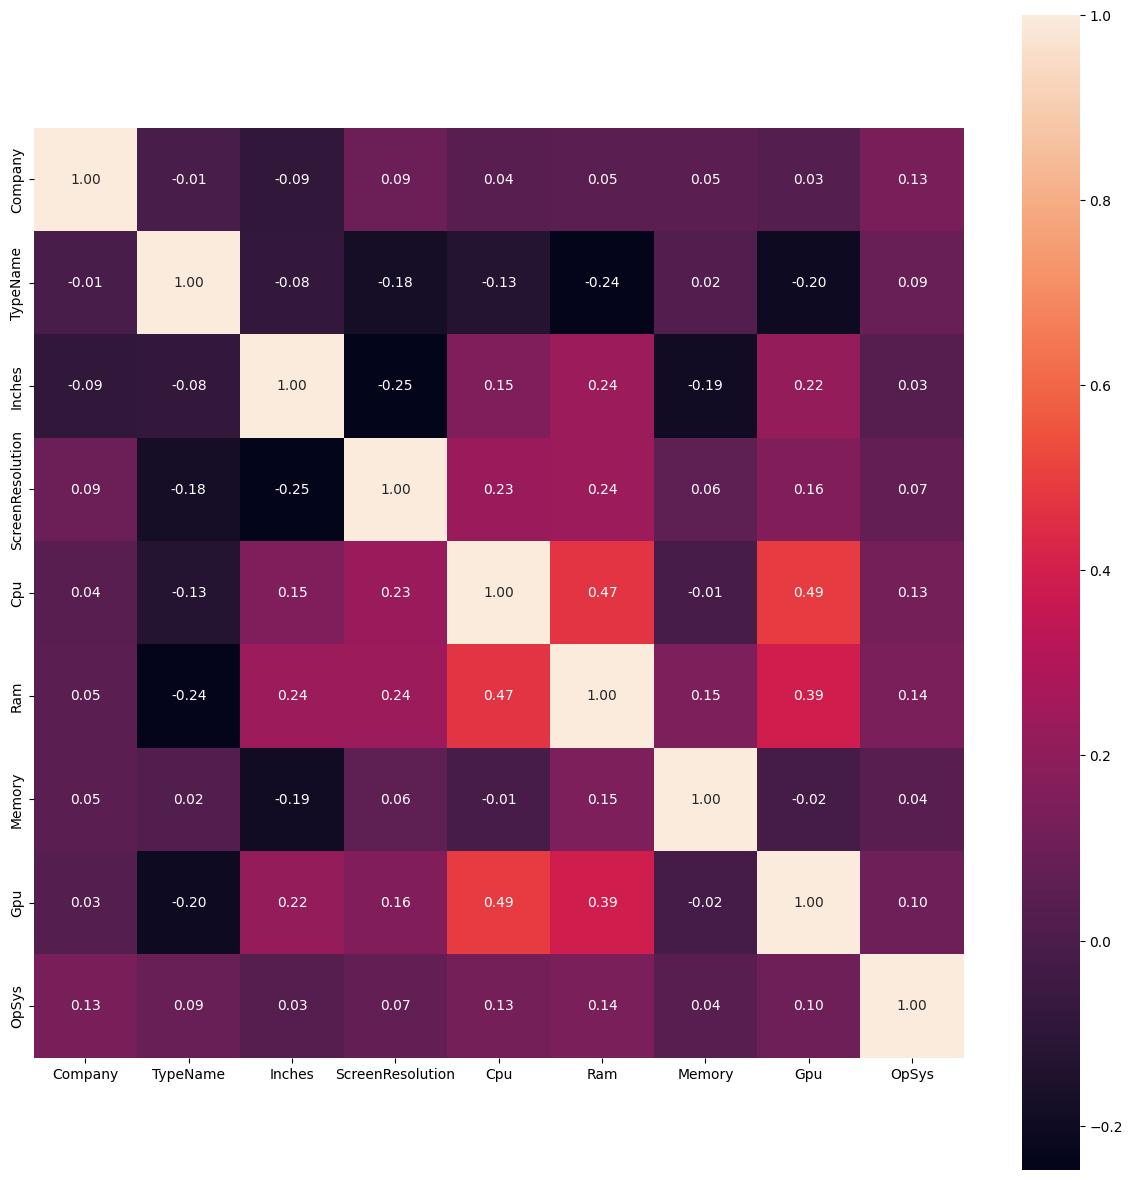

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(data.iloc[:, :9].corr(), annot=True, square=True, fmt="0.2f", vmax=1)
plt.show()

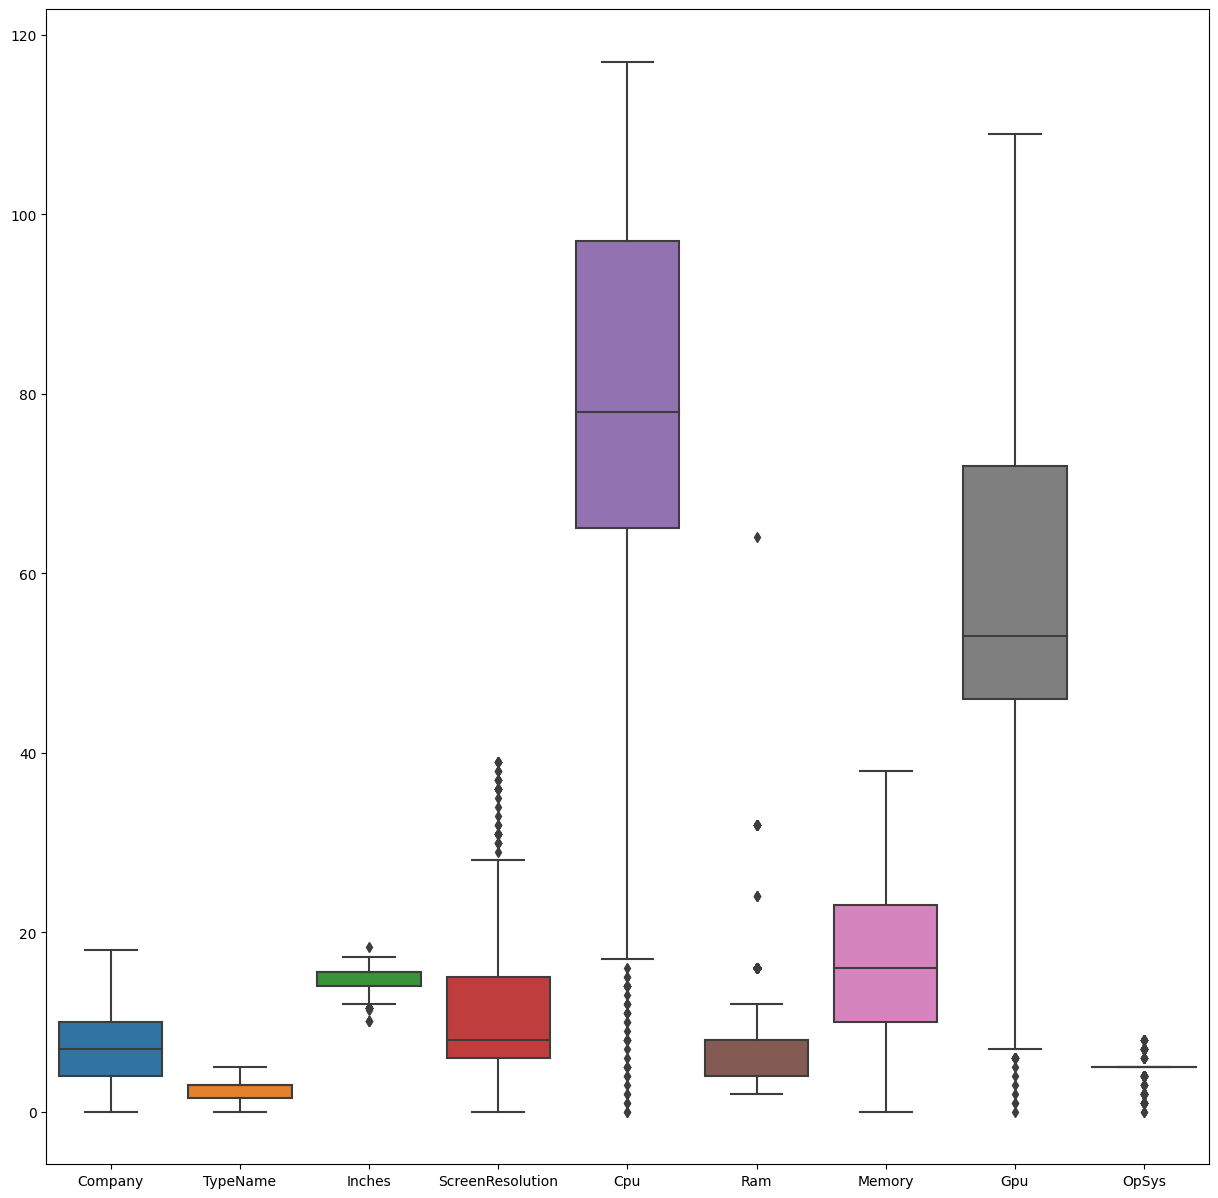

In [17]:
plt.figure(figsize=(15,15))
sns.boxplot(data.iloc[:, :9])
plt.show()

## Splitting Data

In [18]:
X = data.drop(columns="Price", axis=1)
Y = data["Price"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)

# x_train = tf.keras.utils.normalize(x_train, axis=1)
# x_test = tf.keras.utils.normalize(x_test, axis=1)

## Building Neural Network

In [19]:
model = k.models.Sequential([
    k.layers.Dense(128, activation="relu"),
    k.layers.Dense(64, activation="linear"),
    k.layers.Dense(32, activation="relu"),
    k.layers.Dense(16, activation="linear"),
    k.layers.Dense(1, activation="linear")
])

model.compile(optimizer=k.optimizers.RMSprop(0.001), loss='mae')

In [20]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), validation_split=0.1)

Epoch 1/100
29/29 [==============================] - 1s 7ms/step - loss: 58030.2773 - val_loss: 57775.7539
Epoch 2/100
29/29 [==============================] - 0s 2ms/step - loss: 48228.7812 - val_loss: 38360.9805
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 26758.1133 - val_loss: 22161.8027
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 21868.2832 - val_loss: 21968.5938
Epoch 5/100
29/29 [==============================] - 0s 2ms/step - loss: 21730.4512 - val_loss: 21877.8203
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 21497.9863 - val_loss: 21743.1914
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 21424.6953 - val_loss: 21640.2402
Epoch 8/100
29/29 [==============================] - 0s 2ms/step - loss: 21227.7207 - val_loss: 21573.3203
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 20968.3008 - val_loss: 21492.0273
Epoch 10/100
29/29 [=================

Epoch 77/100
29/29 [==============================] - 0s 2ms/step - loss: 15090.4385 - val_loss: 15739.9844
Epoch 78/100
29/29 [==============================] - 0s 2ms/step - loss: 15292.4141 - val_loss: 15722.2646
Epoch 79/100
29/29 [==============================] - 0s 2ms/step - loss: 15210.0605 - val_loss: 15729.3193
Epoch 80/100
29/29 [==============================] - 0s 2ms/step - loss: 14950.1260 - val_loss: 16145.8799
Epoch 81/100
29/29 [==============================] - 0s 2ms/step - loss: 15228.9395 - val_loss: 15695.5156
Epoch 82/100
29/29 [==============================] - 0s 2ms/step - loss: 15237.4023 - val_loss: 15748.1201
Epoch 83/100
29/29 [==============================] - 0s 2ms/step - loss: 15117.2139 - val_loss: 16001.0869
Epoch 84/100
29/29 [==============================] - 0s 2ms/step - loss: 15100.6768 - val_loss: 15649.7773
Epoch 85/100
29/29 [==============================] - 0s 2ms/step - loss: 15043.7852 - val_loss: 15651.4678
Epoch 86/100
29/29 [========

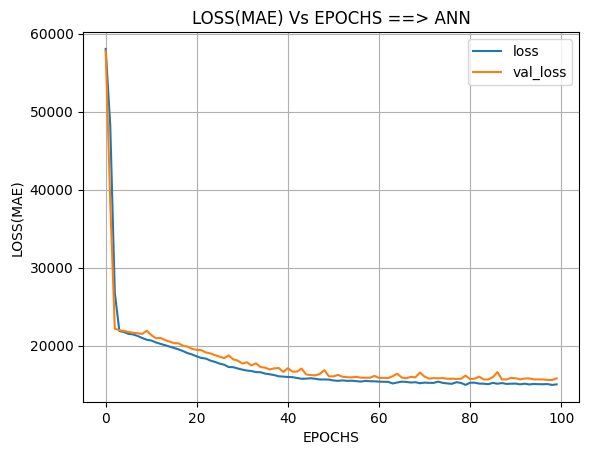

In [21]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("LOSS(MAE) Vs EPOCHS ==> ANN")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS(MAE)")
plt.legend()
plt.grid()
plt.show()

In [22]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 878us/step - loss: 15786.2109


15786.2109375

In [23]:
prediction = model.predict(x_test)

13/13 [==============================] - 0s 912us/step


In [24]:
print("THe R2_score is ==> ", r2_score(prediction, y_test))

THe R2_score is ==>  0.511923828178128


In [25]:
model_RFR = RandomForestRegressor(n_estimators=2000, max_depth=500)
model_RFR.fit(x_train, y_train)


print(f"The Accuracy Score Of Train Model in -RandomForestRegressor- is {model_RFR.score(x_train, y_train)} ")
print(f"The Accuracy Score Of Test Model in -RandomForestRegressor- is {model_RFR.score(x_test, y_test)} ")

The Accuracy Score Of Train Model in -RandomForestRegressor- is 0.9762075572174995 
The Accuracy Score Of Test Model in -RandomForestRegressor- is 0.8450169513082447 
